In [81]:
%pylab
%matplotlib inline
from scipy.stats import norm

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [82]:
# generate true states

N = 100
# 0 ~ 99 까지 tvec 에 들어가 있음. 
tvec = np.arange(N)

z = np.zeros(N)
z[0] = np.random.rand() * 10

Gamma = 0.1
A = 0.99

for t in range (1, N):
    # the location(loc) is the mean 
    # the scale is the standard deviation.
    # 이전의 값을 사용해서 다음 값을 추출 함. 
    z[t] = norm.rvs(loc=z[t-1]*A, scale=Gamma**0.5)


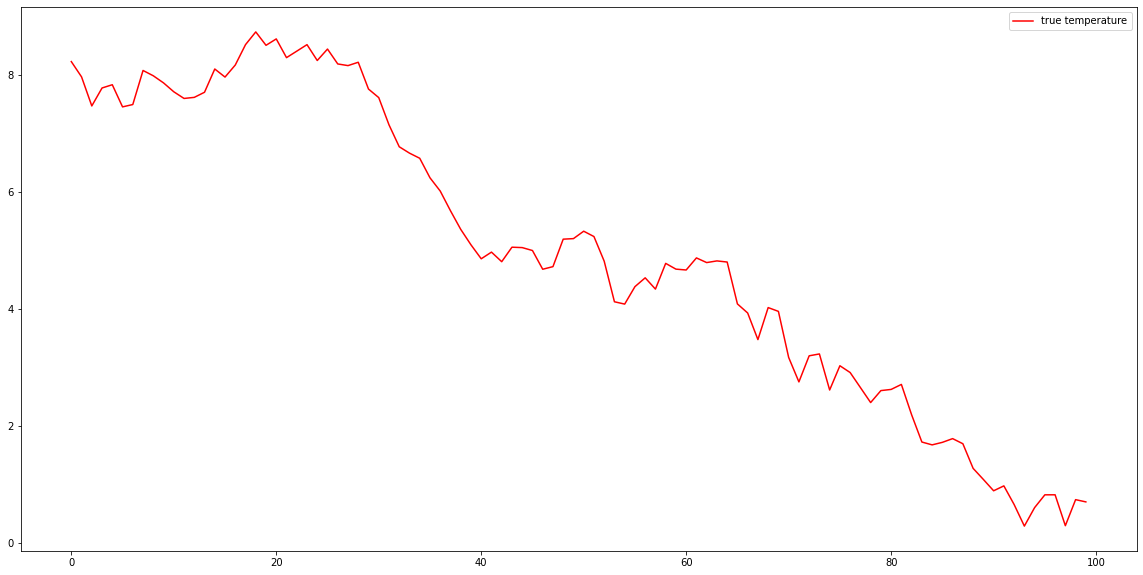

In [83]:
plt.figure(figsize=(20,10))
plt.plot(tvec, z, c='r', label='true temperature')
plt.legend()
plt.show()

In [84]:
x = np.zeros(N)

C = 1.1
Sigma = 0.2

for t in range(N):
    # 위에서 구한 z 의 값을 가지고, 
    # loc = 1.1 * z[t]
    # scale(std) = 0.2**0.5 를 함. 
    x[t] = norm.rvs(loc=C*z[t], scale=Sigma**0.5)

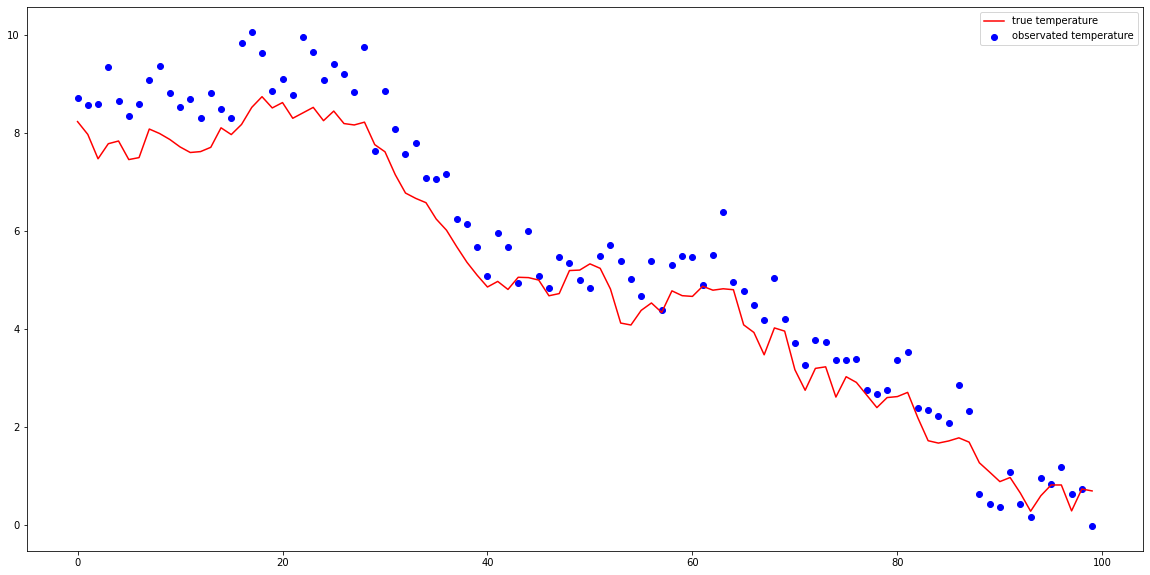

In [85]:
plt.figure(figsize=(20,10))
plt.plot(tvec, z, c='r', label='true temperature')
plt.scatter(tvec, x, c='b', label='observated temperature')
plt.legend()
plt.show()

In [86]:
# 우리가 하고 싶은 것은 scatter된 것만을 이해 해서 plot된 라인을 예측하는 것이다. 

mu = np.zeros(N)
V = np.zeros(N)

# A = 0.99
# Gamma = 0.1

for t in range(N):
    
    # P = estimated covariance matrix of state 't' without sensors 
    P = A * V[t-1] * A + Gamma
    # K = Kalman constant 
    # calculate Kalman constant 
    K = P * C * 1.0 / (C*P*C + Sigma)
    
    # x[t]      : sensors 
    # A*mu[t-1] : estimated state without sensors 
    # mu[t]     : estimiated state with sensors 
    mu[t] = A * mu[t-1] + K * (x[t] - C*A*mu[t-1])
    V[t] = P - K*C*P
    
# predictions before observing the next data point:
muminus = np.insert(mu[:-1], 0, 0)
# mu : state with observation(sensor)

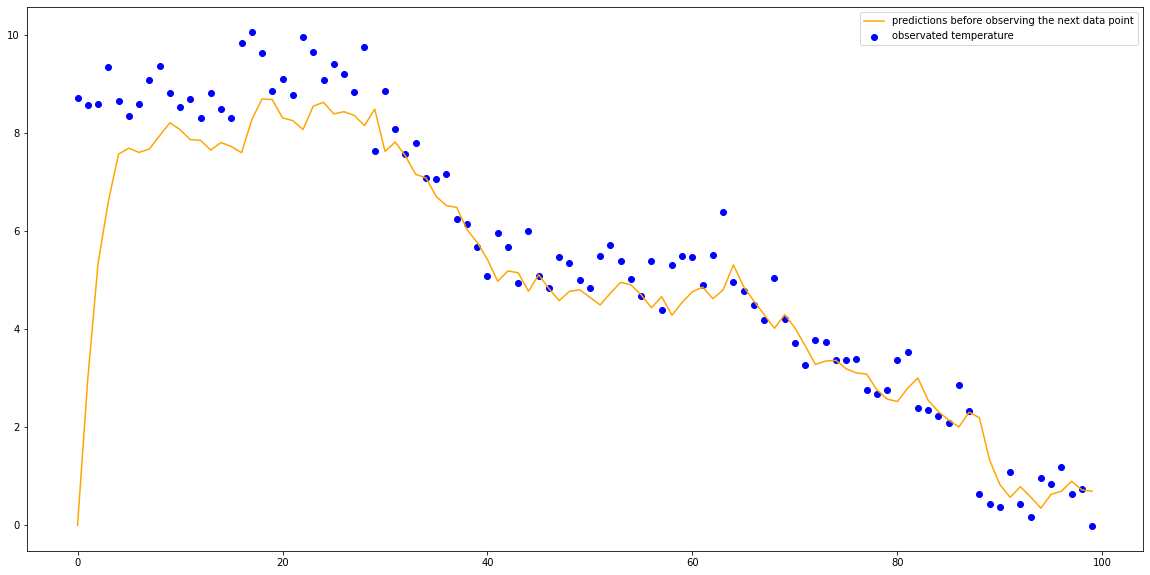

In [87]:
plt.figure(figsize=(20,10))
plt.scatter(tvec, x, c='b', label='observated temperature') # 관측 데이터 
plt.plot(tvec, muminus, c='orange', label='predictions before observing the next data point') 
plt.legend()
plt.show()

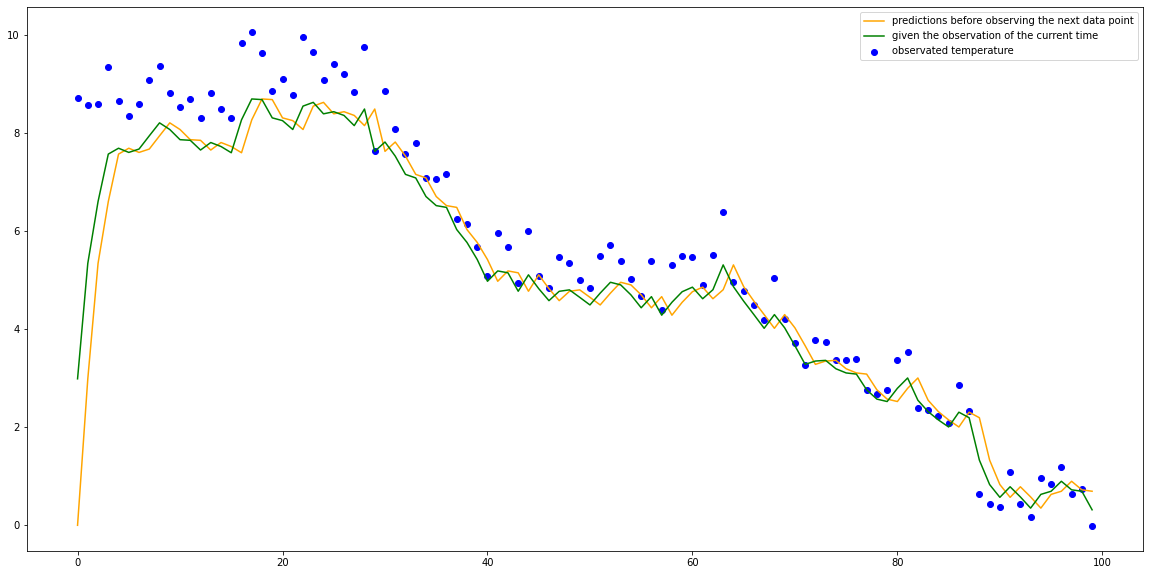

In [88]:
plt.figure(figsize=(20,10))
plt.scatter(tvec, x, c='b', label='observated temperature')
plt.plot(tvec, muminus, c='orange', label='predictions before observing the next data point')
plt.plot(tvec, mu, c='g', label='given the observation of the current time')
plt.legend()
plt.show()

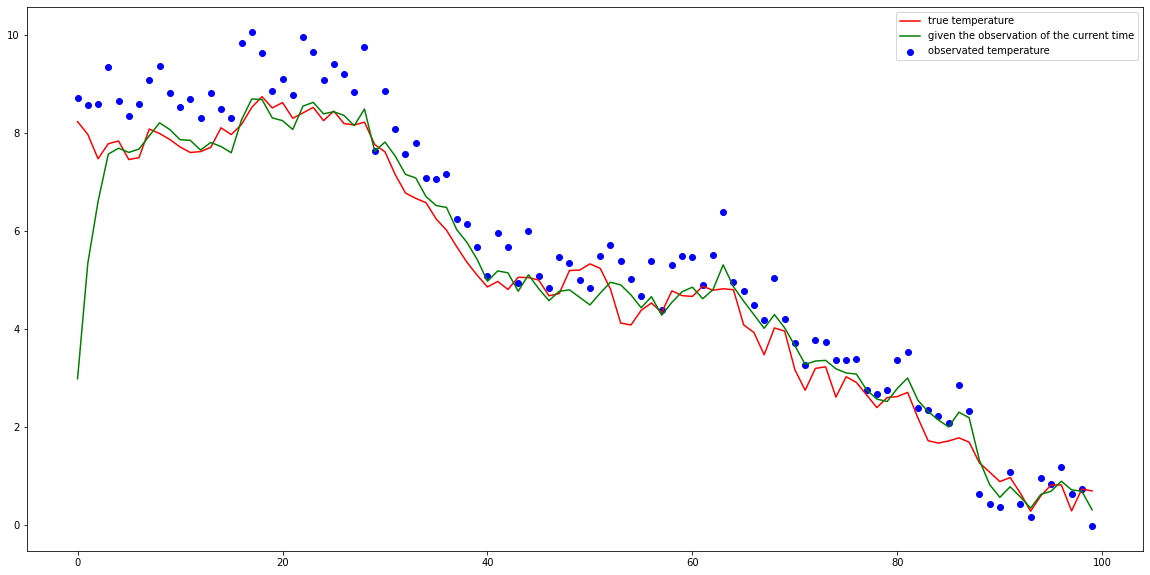

In [89]:
plt.figure(figsize=(20,10))
plt.plot(tvec, z, c='r', label='true temperature')
plt.scatter(tvec, x, c='b', label='observated temperature')
plt.plot(tvec, mu, c='g', label='given the observation of the current time')
plt.legend()
plt.show()